In [2]:
import os
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from functools import reduce
import sys

In [98]:
import scipy.cluster.hierarchy as sch

In [65]:
path = '/common/Atlas/' 
all_files = glob.glob(os.path.join(path,"Tran*"))

In [66]:
all_files

['/common/Atlas/Transcription profiling by array of Arabidopsis mutant for arf2 after treatment with brassinazole.csv',
 '/common/Atlas/Transcription profiling by array of Arabidopsis mutant for arr10 and arr12 after treatment with t-zeatin.csv',
 '/common/Atlas/Transcription profiling by array of Arabidopsis after treatment with auxin and brassinazole or auxin only.csv',
 '/common/Atlas/Transcription profiling by array of four distinct tissues of Arabidopsis root and whole root treated with (auxin) indole-3-acetic acid against mock-treated controls.csv',
 '/common/Atlas/Transcription profiling of Arabidopsis seedlings treated with glucose and indole-3-acetic acid (auxin) to study glucose-auxin interactions.csv',
 '/common/Atlas/Transcription profiling of Arabidopsis plants treated with indole-3-acetic acid (IAA) or IAA plus dexamethasone.csv',
 '/common/Atlas/Transcription profiling of aerial parts of Arabidopsis wild type and arr10 arr12 double mutant seedlings treated with the cytok

In [ ]:
# chomd -R 777 으로 권한조정
# ['Gene ID','Gene Name','DesignElementAccession'] 공통점 묶어서 reduce,lambda,merge 사용하여 df_mat을 만듬.

In [4]:
df_list = [pd.read_csv(open(x),delimiter=',' ,comment='#') for x in all_files]

In [64]:
df_list[16].head()

,Gene ID,Gene Name,DesignElementAccession,GSM566554,GSM566570,GSM566562,GSM566565,GSM566560,GSM566563,GSM566574,...,GSM566566,GSM566556,GSM566564,GSM566569,GSM566571,GSM566573,GSM566572,GSM566561,GSM566555,GSM566557
0,AT1G01010,NAC001,261585_at,2.789737,3.055544,2.939477,2.833341,3.069130,2.865598,3.007981,...,3.007622,3.106199,2.937103,2.982234,3.241456,3.292402,3.028502,3.031124,3.198189,3.007981
1,AT1G01030,NGA3,261568_at,2.699298,2.469103,2.676072,2.469103,3.003797,2.646309,2.872586,...,2.887678,2.918987,2.563552,2.469065,2.656620,2.677486,3.011644,2.699298,3.533549,2.450919
2,AT1G01040,DCL1,261584_at,3.590816,4.445586,3.608860,3.548829,4.000159,3.289225,3.539996,...,3.890903,2.812931,3.590816,4.431957,3.327704,3.683487,3.287549,4.121435,3.300236,3.676020
3,AT1G01050,PPA1,261579_at,5.224861,6.668738,6.446815,5.665774,5.473378,6.033354,6.158367,...,4.898910,4.385683,6.256884,6.518990,5.258337,5.115644,5.755671,6.867242,3.846946,5.840742
4,AT1G01060,LHY,261569_at,2.725040,2.681604,2.531229,2.690779,2.611622,2.834175,2.871175,...,2.675125,2.851609,2.717234,2.687458,2.722341,2.752851,2.504333,2.773233,2.912970,2.717234


In [7]:
df_mat = reduce(lambda a,b : pd.merge(a,b,on=['Gene ID','Gene Name','DesignElementAccession'],how ='outer'),df_list)

In [9]:
df_mat.head()

,Gene ID,Gene Name,DesignElementAccession,Col_BRZ_rep3,Col_mock_rep3,Col_mock_rep1,Col_mock_rep2,Col_BRZ_rep2,Col_BRZ_rep1,Sakakibara_1-2_TZ-treatment-wild_Rep2_ATH1,...,GSM566566,GSM566556,GSM566564,GSM566569,GSM566571,GSM566573,GSM566572,GSM566561,GSM566555,GSM566557
0,AT1G01010,NAC001,261585_at,6.360929,7.106075,7.065899,6.701490,6.390286,6.613429,4.911840,...,3.007622,3.106199,2.937103,2.982234,3.241456,3.292402,3.028502,3.031124,3.198189,3.007981
1,AT1G01030,NGA3,261568_at,4.293181,4.481487,4.399528,4.917085,4.403067,4.484703,5.331372,...,2.887678,2.918987,2.563552,2.469065,2.656620,2.677486,3.011644,2.699298,3.533549,2.450919
2,AT1G01040,DCL1,261584_at,7.418491,7.329794,7.252073,6.866045,7.178751,7.456707,7.693885,...,3.890903,2.812931,3.590816,4.431957,3.327704,3.683487,3.287549,4.121435,3.300236,3.676020
3,AT1G01050,PPA1,261579_at,10.145095,10.054270,9.911589,9.732922,9.940813,10.284046,10.227976,...,4.898910,4.385683,6.256884,6.518990,5.258337,5.115644,5.755671,6.867242,3.846946,5.840742
4,AT1G01060,LHY,261569_at,9.019015,8.791247,9.067491,8.676478,9.437800,9.251234,9.975793,...,2.675125,2.851609,2.717234,2.687458,2.722341,2.752851,2.504333,2.773233,2.912970,2.717234


In [68]:
df_auxin=df_list[2],df_list[3],df_list[4],df_list[5],df_list[7],df_list[13],df_list[15]

In [69]:
df_auxin_mat=reduce(lambda a,b : pd.merge(a,b,on=['Gene ID','Gene Name','DesignElementAccession'],how ='outer'),df_auxin)

In [71]:
df_auxin_mat.shape

(20599, 141)

<Figure size 7200x7200 with 0 Axes>

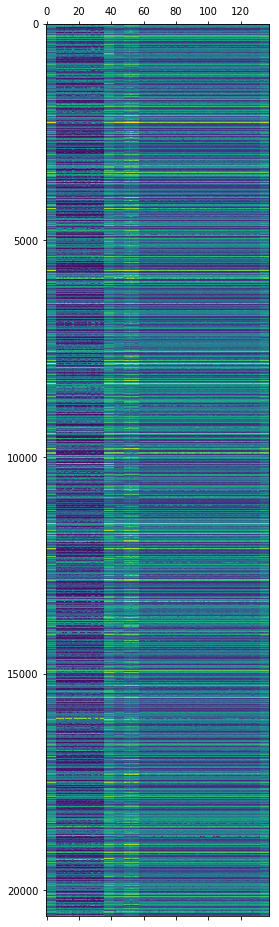

In [74]:
matrix = df_auxin_mat.values[:,3:].astype(float)
plt.figure(figsize=(100,100))
plt.matshow(matrix,aspect='auto')
plt.show()

In [75]:
row_mean = np.mean(matrix,axis=1)
row_std  = np.std(matrix,axis=1)

<Figure size 7200x7200 with 0 Axes>

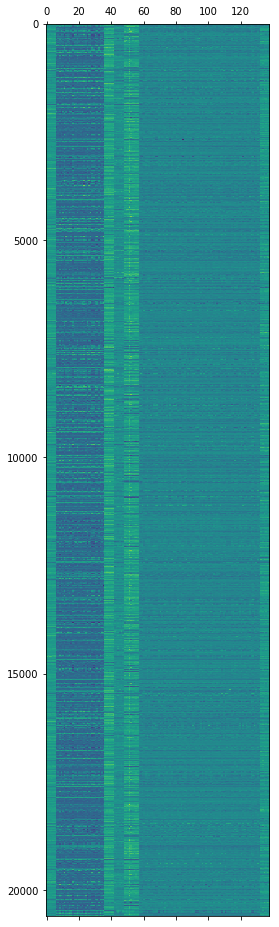

In [76]:
modified_matrix = ((matrix.T - row_mean)/row_std).T
plt.figure(figsize=(100,100))
plt.matshow(modified_matrix,aspect='auto')
plt.show()

<Figure size 7200x7200 with 0 Axes>

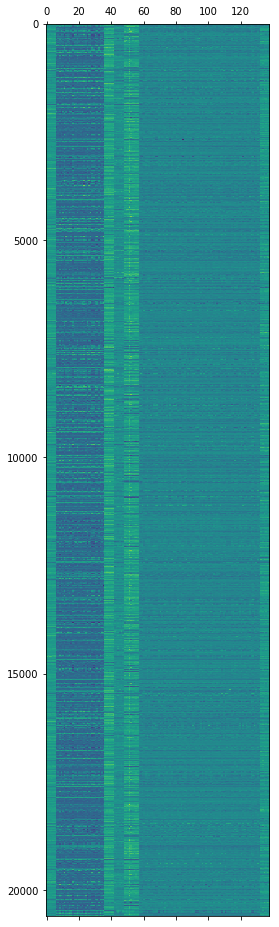

In [77]:
modified_matrix = ((matrix.T - row_mean)/row_std).T
m = ~np.isnan(modified_matrix[:,0])
modified_matrix_nonan = modified_matrix[m]
plt.figure(figsize=(100,100))
plt.matshow(modified_matrix_nonan,aspect='auto')
plt.show()

In [81]:
modified_matrix_nonan.shape

(20599, 138)

In [93]:
df_auxin_mat['genename'] = df_auxin_mat['Gene ID'].apply(lambda x : ''.join(x.split('G')[0]))
df_auxin_mat_ix = df_auxin_mat.set_index('genename')

In [94]:
df_auxin_mat_ix

,Gene ID,Gene Name,DesignElementAccession,GSM325130,GSM325126,GSM325131,GSM325129,GSM325127,GSM325128,GSM871252,...,Quint_2-53_Fei-0-30min_Rep2_ATH1,Quint_2-68_Col-0-1h_Rep2_ATH1,Quint_2-22_Sha-3h_Rep1_ATH1,Quint_2-27_C24-0h_Rep3_ATH1,GSM9571,GSM9573,GSM9574,GSM9572,GSM9575,GSM9576
genename,,,,,,,,,,,,,,,,,,,,,
AT1,AT1G01010,NAC001,261585_at,6.472676,6.423957,6.451320,6.506572,6.485740,6.540317,7.514479,...,5.113542,5.478352,6.553230,5.156750,6.157601,5.897247,7.106554,6.510224,7.424476,6.822313
AT1,AT1G01030,NGA3,261568_at,5.293209,5.195125,4.898861,5.293209,5.434730,5.379617,2.013929,...,4.297806,4.464439,4.170508,4.242638,6.125032,6.153964,5.504830,6.085973,5.939836,5.692496
AT1,AT1G01040,DCL1,261584_at,7.681412,7.948013,7.805065,7.717471,7.836716,7.960368,7.178522,...,6.319228,6.291110,6.627554,6.492427,7.027386,7.293963,6.743521,6.584498,6.705933,6.969002
AT1,AT1G01050,PPA1,261579_at,10.882766,10.809214,10.913889,10.879180,10.787992,10.840508,6.854569,...,10.016077,9.761379,10.113336,10.091094,10.139047,10.365913,10.309499,10.475431,10.284986,10.161567
AT1,AT1G01060,LHY,261569_at,8.517345,8.842384,8.490612,8.413240,8.785539,8.838193,2.358368,...,9.170270,8.887163,7.175948,9.761141,6.530813,6.021691,6.947817,6.977900,6.404808,6.330367
AT1,AT1G01070,NaN,261576_at,6.899770,7.085253,6.601983,7.085587,7.211859,7.231884,2.064943,...,6.755446,6.124633,6.884742,6.725194,6.949876,7.174545,7.366976,7.253738,6.761225,7.022148
AT1,AT1G01080,NaN,261577_at,8.762008,8.869754,8.813605,8.814534,8.896806,8.825776,2.200227,...,7.262322,7.309200,6.577606,7.543236,9.509530,9.215654,9.258060,9.233627,9.317113,9.501976
AT1,AT1G01090,PDH-E1 ALPHA,261583_at,11.554513,11.671529,11.771917,11.540357,11.666651,11.639701,8.670721,...,10.435692,10.165035,10.403055,10.504825,11.130757,11.256964,11.135776,11.165332,11.118654,11.180636
AT1,AT1G01100,RPP1A,261578_at,12.606025,12.416973,12.584798,12.579291,12.438454,12.379054,9.965252,...,11.993121,11.984587,11.945952,12.058683,11.784957,11.970677,12.003187,11.897799,11.864138,12.069415


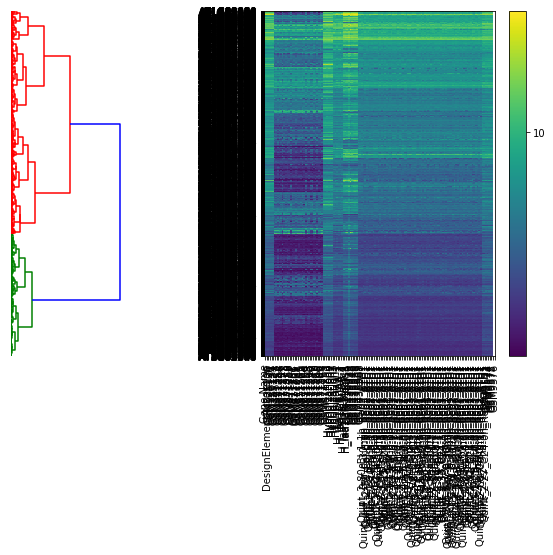

In [118]:
genename = 'AT1'
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
df = df_auxin_mat_ix.loc[genename]
D  = df[df.columns[3:]].values
Y  = sch.linkage(D, method='ward')
Z = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_axis_off()
zix = Z['leaves']

ax2 = fig.add_axes([0.53,0.1,0.5,0.6])
cax = ax2.pcolor(D[zix])
ax2.set_yticks(np.arange(0.5, len(df.index), 1))
ax2.set_yticklabels(df['Gene ID'][zix],ha='right')

ax2.set_xticks(np.arange(0.5, len(df.columns[1:]), 1))
ax2.set_xticklabels(df.columns[1:],rotation='vertical')
fig.colorbar(cax, ticks=[0, 10,20,30,40,50,60], orientation='vertical')
plt.savefig(genename+'.hm.png',bbox_inches='tight')

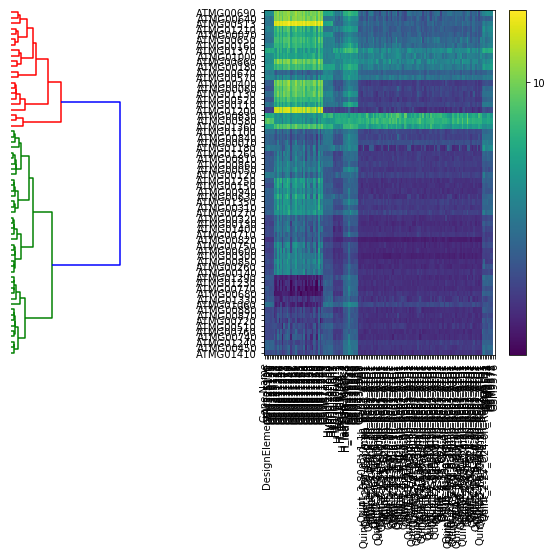

In [119]:
genename = 'ATM'
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
df = df_auxin_mat_ix.loc[genename]
D  = df[df.columns[3:]].values
Y  = sch.linkage(D, method='ward')
Z = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_axis_off()
zix = Z['leaves']

ax2 = fig.add_axes([0.53,0.1,0.5,0.6])
cax = ax2.pcolor(D[zix])
ax2.set_yticks(np.arange(0.5, len(df.index), 1))
ax2.set_yticklabels(df['Gene ID'][zix],ha='right')

ax2.set_xticks(np.arange(0.5, len(df.columns[1:]), 1))
ax2.set_xticklabels(df.columns[1:],rotation='vertical')
fig.colorbar(cax, ticks=[0, 10,20,30,40,50,60], orientation='vertical')
plt.savefig(genename+'.hm.png',bbox_inches='tight')